# Storytelling Data Visualization

In the previous lesson, we learned a few design principles and created the visualization below:

![](screen3_2.png)

According to some, what we did is storytelling with data. However, is presenting the top 20 countries according to death toll really a story?

In a broad sense, a story is a sequence of events: something happens, then something else happens, and so on. Rather than events, our graph above presents facts.

Another story element is change: something or someone changes throughout the story. Our graph is static: the information we present doesn't show any element of change.

There's nothing wrong with showing facts or presenting static information, but that's not a story. To create a data story, we need to wrap those numerical facts into events that show change.

For our example above, we can take the particular case of the United States and show how the death toll has changed since the beginning of the pandemic. Below, we see an example of a data story:

![](screen1_1.png)

This data story shows the evolution of the death toll in the United States. At the end of March, we see the death toll at 2,398 deaths, but in December, it became 295,406 — it has changed. Following the four line plots, we see a sequence of events that led to that change. For instance, a surge in the average number of daily deaths starting in April resulted in a large number of deaths at the end of June.

Note that if we break down the graph, this is still a lot of numerical facts. We've just assembled them into a sequence of events that are logically and temporally connected and create meaning together — a story.

Now, let's learn how to recreate the data story above using matplotlib.

The data story visualization we showed on the previous screen is the result of using Matplotlib's object-oriented interface. The visualization is a grid chart composed of four different line plots — with a configuration of four rows by one column.

We'll learn how to recreate this graph throughout this lesson. We begin with creating a grid chart of four rows by one column using the `plt.subplots()` [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). We also adjust the figure size to `(6, 8)` since we want to keep a mobile-friendly ratio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

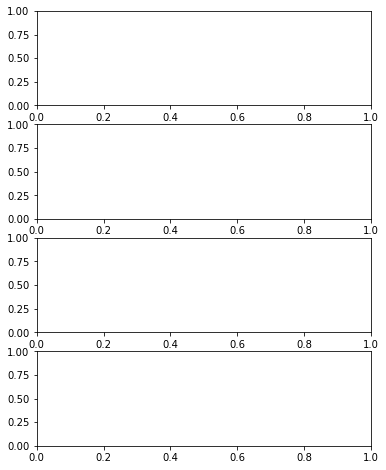

In [2]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))
plt.show()

The function returns two objects: a `Figure` and an array of four `Axes` objects. We use `(ax1, ax2, ax3, ax4)` to assign each object within that array to a different variable.

To draw on the individual plots, we can use Matplotlib methods on each of the four `Axes` objects. Below, we draw a line plot on the first and the third plot.

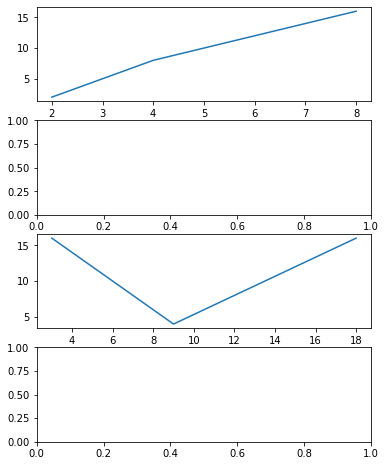

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))

ax1.plot([2, 4, 8],[2, 8, 16])
ax3.plot([3, 9, 18], [16, 4, 16])
plt.show()

In the next exercise, we'll draw the four line plots that show the evolution of average daily deaths per month in 2020. We collected the data from the [World Health Organization](https://covid19.who.int/) on December 15th, 2020. Below, we see the first five rows of the data:

In [4]:
death_toll = pd.read_csv('covid_avg_deaths.csv')

In [5]:
death_toll.head()

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448


Let's see what the two columns mean:

- `Month`: the month number.
- `New_Deaths`: the number of daily average deaths for each month. A value of 1,844 for April means that for each day of April, there were 1,844 deaths, on average.

Let's read in the data set and draw the four line plots.

### Exercise:


- Read in the `covid_avg_deaths.csv` file into a pandas DataFrame, and assign the result to a variable named `death_toll`.
- Create a grid chart of four rows by one column with a figure size of `(6, 8)`.
- On each of the four plots, draw a line plot with the `Month` column on the x-axis and the `New_deaths` columns on the y-axis.


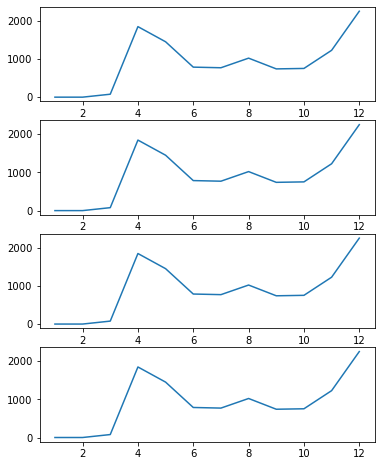

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
    
plt.show()

We can also use the loop to apply a change to all Axes objects. Below, for instance, we remove the y- and x-tick labels for all plots:

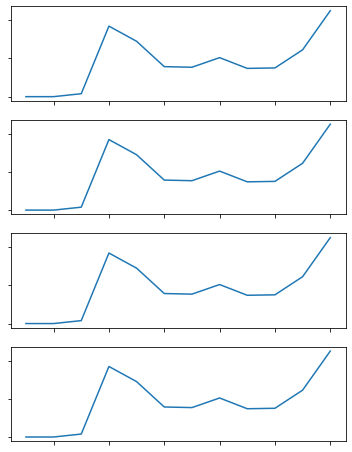

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
plt.show()

In the spirit of maximizing the data-ink ratio, let's also remove the ticks and the spines (the x- and y-axes).

### Exercise:

Iterate over a list containing the four `Axes` objects. For each `Axes` object, do the following:

- Generate a line plot with the `Month` column on the x-axis and the `New_deaths` columns on the y-axis.
- Remove the x- and y-tick labels.
- Remove all ticks using the `Axes.tick_params()` method.
- Remove all the spines using the `Axes.spines[location].set_visible()` method.


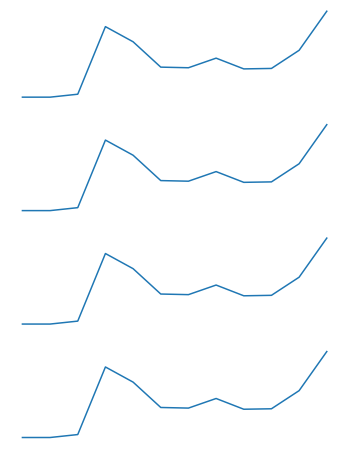

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
    
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    ax.tick_params(left=False, bottom=False)
    
    for location in ['bottom', 'top', 'left', 'right']:
        ax.spines[location].set_visible(False)
    
plt.show()

The storytelling data visualization we first showed emphasizes four periods:

- January–March
- March–June
- June–October
- October–December

![](screen1_1.png)

To highlight these four periods, we begin by coloring all plots in a shade of red. Then, we increase their transparency by using the `alpha` parameter.

```
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    # Assume the rest of the code is written
```

![](screen4_1.png)

Now, we draw separate line plots on top of the current ones. We begin by drawing the first one — we use the same color and increase the line width using the `linewidth` parameter.

```
# Assume the rest of the code is written 
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
```

![](screen4_2.png)

Notice that above we used `ax1` in `ax1.plot()`, not just `ax`. We take the same approach for `ax2`.

```
# Assume the rest of the code is written 
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
```

![](screen4_3.png)

Matplotlib can be very powerful if you're a little imaginative. You'll often want to make a specific change and search for a function that will specifically handle that change. This approach won't always work because the function you want may not exist.

However, it'll often be possible to get what you want by combining what Matplotlib already has. To do that, identify the basic parts of what you want to create. Then, try to create those basic parts using Matplotlib.

Let's now highlight the last two periods: June–October and October–December. We've already added the code for the first two.

### Exercise:


- Highlight the June–October period on the third plot. Use color='#af0b1e' and linewidth=2.5.
- Highlight the October–December period on the fourth plot. Use color='#af0b1e' and linewidth=2.5.


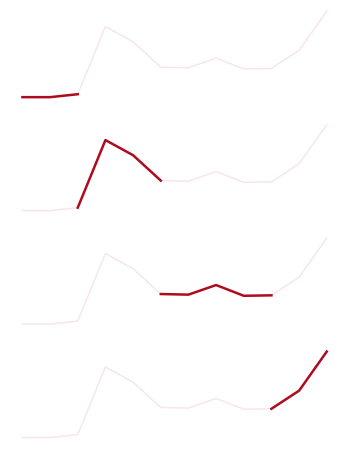

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(death_toll['Month'], 
            death_toll['New_deaths'], 
            color='#af0b1e', 
            alpha=0.1)

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    ax.tick_params(left=False, bottom=False)
    
    for location in ['bottom', 'top', 'left', 'right']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][0:3], death_toll['New_deaths'][0:3], color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6], color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10], color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:], death_toll['New_deaths'][9:], color='#af0b1e', linewidth=2.5)

plt.show()

Right now, our graph has a very high data-ink ratio, which is good. Except for the four highlighted periods, we can't remove anything without losing important data.

However, we still need to add a few structural elements so the audience can understand the visualization.

First, we're going to show the quantities by adding three labels on the first plot — we do this using the `Axis.text()` [method](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html). We arrived at the exact x- and y-coordinates you see below through a process of trial and error.

```
# Assume the rest of the code is written
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
```

![](screen5_2.png)

The three labels give the audience a sense of the magnitude and the range of the quantities. We only want to show people a trend, so these three labels are enough. The other three plots are identical, so we don't need to add more ink.

However, if our purpose were to show all quantities, adding only three labels wouldn't be enough. One solution is to show readers a separate table rather than decreasing the data-ink ratio with extra labels.

The three labels we added correspond to the quantities on the y-axis (the average number of daily deaths per month). On the x-axis, we have month names, and we need to make that clear.

Below, we add the 'Jan-Mar' label using `Axes.text()`. Specifically, notice the `rotation` parameter we use to slightly rotate the text.

```
# Assume the rest of the code is written
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
```

Let's now add labels for the other three periods. We've already added the code for the first period and for the quantity labels.

### Exercise:



1. Add the label Mar - Jun to the second Axes object. The label must have the following properties:
   - The x-coordinate is 3.7.
   - The y-coordinate is 800.
   - The color is #af0b1e.
   - It is bolded.

2. Add the label Jun - Oct to the third Axes object. The label must have the following properties:
   - The x-coordinate is 7.1.
   - The y-coordinate is 500.
   - The color is #af0b1e.
   - It is bolded.

3. Add the label Oct - Dec to the fourth Axes object. The label must have the following properties:
   - The x-coordinate is 10.5.
   - The y-coordinate is 600.
   - The color is #af0b1e.
   - It is bolded.
   - It is rotated to 45 degrees.


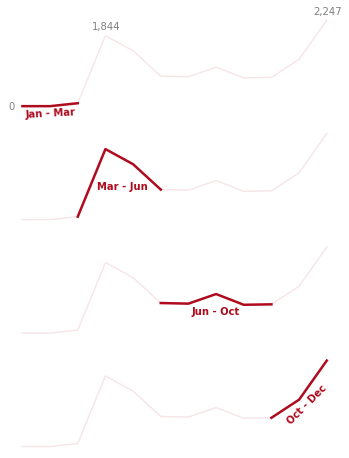

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(death_toll['Month'], 
            death_toll['New_deaths'], 
            color='#af0b1e', 
            alpha=0.1)

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    ax.tick_params(left=False, bottom=False)
    
    for location in ['bottom', 'top', 'left', 'right']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][0:3], death_toll['New_deaths'][0:3], color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e', rotation=3, weight='bold')

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6], color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')

ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10], color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')

ax4.plot(death_toll['Month'][9:], death_toll['New_deaths'][9:], color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold', rotation=45)

plt.show()

Our visualization is still not readable enough. Readers see four identical plots, a few quantities, and four distinct periods. However, they can't tell what the quantities mean.

We'll use the subtitle to inform readers about what the quantities describe. Recall from our last lesson that we should use the title to show more data.

Let's add a title and a subtitle in the next exercise.

### Exercise:



1. Add the title The virus kills 851 people each day to the first Axes object (data source: [World Health Organization](https://covid19.who.int/)). The text must have the following properties:
  - The x-coordinate is 0.5.
  - The y-coordinate is 3500.
  - The font size is 14.
  - It is bolded.

2. Add the subtitle Average number of daily deaths per month in the US. The text must have the following properties:
  - The x-coordinate is 0.5.
  - The y-coordinate is 3150.
  - The font size is 12.


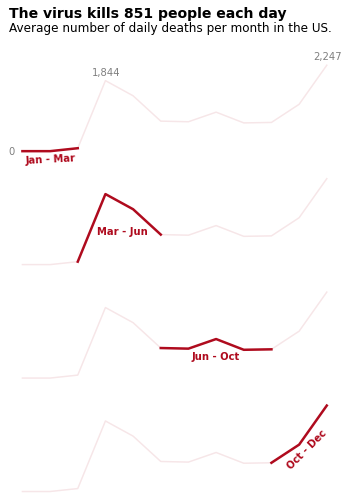

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(death_toll['Month'], 
            death_toll['New_deaths'], 
            color='#af0b1e', 
            alpha=0.1)

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    ax.tick_params(left=False, bottom=False)
    
    for location in ['bottom', 'top', 'left', 'right']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][0:3], death_toll['New_deaths'][0:3], color='#af0b1e', linewidth=2.5)

# Title and subtitle
ax1.text(0.5, 3500, 'The virus kills 851 people each day', size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US.', size=12)

ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e', rotation=3, weight='bold')

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6], color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')

ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10], color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')

ax4.plot(death_toll['Month'][9:], death_toll['New_deaths'][9:], color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold', rotation=45)

plt.show()

The last thing we're going to add to our visualization is a progress bar. At the beginning of the lesson, we saw the complete graph with four progress bars showing the cumulative death toll.

![](screen1_1.png)

The progress bars follow the change in the total number of cumulative deaths over the four highlighted periods. They represent a detailed breakdown of the death toll in the United States. Assuming our audience has already seen the graph below, we don't need to explain the progress bar.

![](screen3_2.png)

We don't have a Matplotlib function specifically built for creating progress bars. Our approach, however, is to do the following:

- Determine the basic parts of a progress bar.
- Use Matplotlib to create those parts.

A progress bar is made of two rectangles. The rectangles are different colors, and the one with a darker shade is put on top of the other — this creates a visual sense of progress.

To create a rectangle in Matplotlib, we can draw a thick horizontal line. To draw a horizontal line, we can use the `Axes.axhline()` [method](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html). The y parameter specifies the y-coordinate of the horizontal line.
```
# Assume the rest of the code is written
ax1.axhline(y=1600)
```

![](screen7_1.png)

Now that we have drawn a horizontal line, we need to do the following:

- Make the line shorter — we control the line's length using xmin and xmax parameters.
- Increase the line's width to make it look like a rectangle — we use the linewidth parameter.
- Change the color to '#af0b1e' and increase its transparency — we use the color and alpha parameters.
```
# Assume the rest of the code is written
ax1.axhline(y=1600, xmin=0.5, xmax=0.8,
           linewidth=6, color='#af0b1e', alpha=0.1)
```

![](screen7_2.png)

Now let's draw this line on all four plots.

### Exercise:

Add a horizontal line for all four plots. The line must have the following properties:

- The y-coordinate is 1600.
- Its length is determined by xmin=0.5 and xmax=0.8.
- Its width is 6.
- The color is #af0b1e and is transparent with an alpha of 0.1.


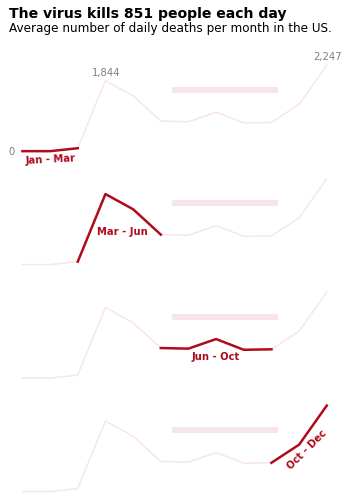

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(death_toll['Month'], 
            death_toll['New_deaths'], 
            color='#af0b1e', 
            alpha=0.1)

    # remove the tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    # remove the ticks
    ax.tick_params(left=False, bottom=False)
    
    # remove the spines
    for location in ['bottom', 'top', 'left', 'right']:
        ax.spines[location].set_visible(False)
        
    # Draw the background for the progress lines
    ax.axhline(y=1600, xmin=0.5, xmax=0.8, linewidth=6, color='#af0b1e', alpha=0.1)
    

# Title and subtitle
ax1.text(0.5, 3500, 'The virus kills 851 people each day', size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US.', size=12)

# Draw each plot
ax1.plot(death_toll['Month'][0:3], death_toll['New_deaths'][0:3], color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6], color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10], color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:], death_toll['New_deaths'][9:], color='#af0b1e', linewidth=2.5)

# Add some quantity labels
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

# Add the month labels
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e', rotation=3, weight='bold')
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold', rotation=45)

plt.show()

In the previous exercise, we added a horizontal line to each plot. For each line, we now need to add a new line on top of each to create a visual sense of progress.

In the `for` loop below, we add a new horizontal line to each plot:
```
# Assume the rest of the code is written
for ax in axes:
    # First line
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e', alpha=0.1)

    # Second line
    ax.axhline(y=1600, xmin=0.5, xmax=0.65,
               linewidth=6, color='#af0b1e')
```

![](screen8_1.png)

The progress bars all indicate the same quantity, so we need to modify them as a function of the cumulative number of deaths. Inside the code block below, we see three lists:

- `deaths`: the number of cumulative deaths at the end of March, June, October, and December (note: we collected the December data on December 15th).
- `proportions`: the proportion of deaths for each of those months relative to the current death toll (December 15th).
- `xmax_vals`: the values we'll need to use for the `xmax` parameter of `Axes.axhline()` to control its length. We multiplied each proportion by `0.3` because `xmax - xmin = 0.8 - 0.5 = 0.3`.

```
deaths = [2398, 126203, 227178, 295406]

proportions = [round(death/295406, 2) for death in deaths]

xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]

print(proportions)

print(xmax_vals)

[0.01, 0.43, 0.77, 1.0]

[0.503, 0.629, 0.731, 0.8]
```
Using this data, we can now adjust the progress bars:

```
# Assume the rest of the code is written
for ax, xmax in zip(axes, xmax_vals):
    # First line
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e', alpha=0.1)

    # Second line
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
```

![](screen8_2.png)

Now let's add the text above the progress bars. For the exercise, we've already added the lists `deaths`, `proportions`, and `xmax_vals`. We've also created this for loop, which you'll need to complete in the following exercise.
```
for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e',
               alpha=0.1)
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
    # You'll complete from here
```

### Exercise:


1. Copy the code block above, and paste it into your code.
2. Inside the for loop you copied, call a Matplotlib method to add the text representing the cumulative number of deaths above each progress bar. The text must have the following properties:
   - The x-coordinate is 7.5.
   - The y-coordinate is 1850.
   - The color is #af0b1e.
   - It's bolded.
   - Each number has a comma as a thousands separator. You can use the `format()` [function](https://docs.python.org/3/library/functions.html#format) to simplify your work. For instance, `format(5000, ',')` outputs the string `'5,000'`.


In [13]:
# deaths = [2398, 126203, 227178, 295406]
# proportions = [round(death/295406, 2) for death in deaths]
# xmax_values = [proportion * 0.3 + 0.5 for proportion in proportions]
# print(proportions)
# print(xmax_values)

[0.503, 0.629, 0.731, 0.8]


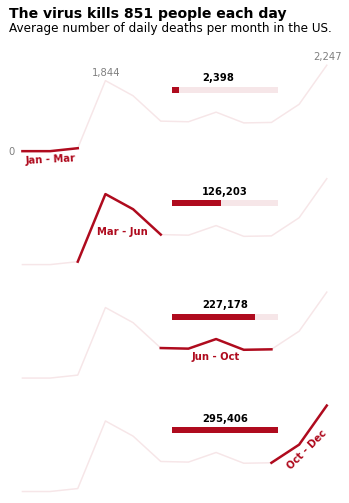

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))

# deaths: the number of cumulative deaths at the end of March, June, October, and December 
#         (note: we collected the December data on December 15th).
# proportions: the proportion of deaths for each of those months relative to the current death toll (December 15th).
# xmax_vals: the values we'll need to use for the xmax parameter of Axes.axhline() to control its length. 
#          We multiplied each proportion by 0.3 because xmax - xmin = 0.8 - 0.5 = 0.3.

deaths = [2398, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_values = [proportion * 0.3 + 0.5 for proportion in proportions]

print(xmax_values)

axes = [ax1, ax2, ax3, ax4]

for ax, xmax, death in zip(axes, xmax_values, deaths):
    ax.plot(death_toll['Month'], 
            death_toll['New_deaths'], 
            color='#af0b1e', 
            alpha=0.1)

    # remove the tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    # remove the ticks
    ax.tick_params(left=False, bottom=False)
    
    # remove the spines
    for location in ['bottom', 'top', 'left', 'right']:
        ax.spines[location].set_visible(False)
        
    # Draw the background for the progress lines
    ax.axhline(y=1600, xmin=0.5, xmax=0.8, linewidth=6, color='#af0b1e', alpha=0.1)
    
    # Draw the foreground for the progress lines
    ax.axhline(y=1600, xmin=0.5, xmax=xmax, linewidth=6, color='#af0b1e')
    
    # Add the progress line text
    ax.text(7.5, 1850, '{:,}'.format(death), weight='bold')
    

# Title and subtitle
ax1.text(0.5, 3500, 'The virus kills 851 people each day', size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US.', size=12)

# Draw each plot
ax1.plot(death_toll['Month'][0:3], death_toll['New_deaths'][0:3], color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6], color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10], color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:], death_toll['New_deaths'][9:], color='#af0b1e', linewidth=2.5)

# Add some quantity labels
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

# Add the month labels
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e', rotation=3, weight='bold')
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold', rotation=45)

plt.show()

In this lesson, we learned two main things:

- A data story is a sequence of events that are logically and temporally connected and have meaning together — simply showing facts doesn't add up to a story.
- How to create a storytelling data visualization with Matplotlib.

In the next lesson, we're going to learn how to create visual patterns using Gestalt principles, and how to guide the audience's attention with pre-attentive attributes.